In [2]:
#神经网络模型
import pandas as pd
from random import shuffle

datafile = r'D:\Books\Python\Python数据分析与挖掘实战\chapter6\chapter6\demo\data\model.xls'
data = pd.read_excel(datafile)
data = data.as_matrix() #将表格数据转换为矩阵
shuffle(data) #随机打乱数据
p = 0.8
train = data[:int(len(data)*p),:] #前80%为训练集
test = data[int(len(data)*p):,:] #后20%为测试集

from keras.models import Sequential #导入神经网络初始化函数
from keras.layers.core import Dense,Activation #导入神经网络层函数、激活函数
netfile = 'C:/Users/lichangcheng/Desktop/net.model' #模型存储路径
net = Sequential()
net.add(Dense(input_dim=3,units=10)) #添加输入从3节点到隐藏层10节点
net.add(Activation('relu')) #隐藏层使用tule激活函数
net.add(Dense(input_dim=10,units=1)) #添加隐藏层10节点到输出层1节点
net.add(Activation('sigmoid')) #输出层使用sigmoid激活函数
net.compile(loss='binary_crossentropy',optimizer='adam') #编译模型
net.fit(train[:,:3],train[:,3],epochs=100,batch_size=1) #训练模型，循环100次
net.save_weights(netfile) #保存模型

Using TensorFlow backend.


Epoch 1/100
232/232 [==============================] - 1s 3ms/step - loss: 0.7142
Epoch 2/100
232/232 [==============================] - 0s 1ms/step - loss: 0.6524
Epoch 3/100
232/232 [==============================] - 0s 1ms/step - loss: 0.6130
Epoch 4/100
232/232 [==============================] - 0s 1ms/step - loss: 0.5782
Epoch 5/100
232/232 [==============================] - 0s 1ms/step - loss: 0.5521
Epoch 6/100
232/232 [==============================] - 0s 1ms/step - loss: 0.5312
Epoch 7/100
232/232 [==============================] - 0s 1ms/step - loss: 0.5111
Epoch 8/100
232/232 [==============================] - 0s 1ms/step - loss: 0.4945
Epoch 9/100
232/232 [==============================] - 0s 1ms/step - loss: 0.4784
Epoch 10/100
232/232 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 11/100
232/232 [==============================] - 0s 1ms/step - loss: 0.4461
Epoch 12/100
232/232 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 13/100


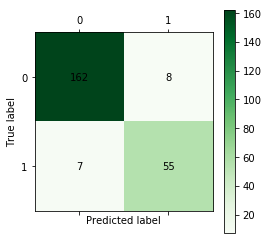

In [3]:
#绘制混淆矩阵
from sklearn.metrics import confusion_matrix
predict_result = net.predict_classes(train[:,:3]).reshape(len(train))
cm = confusion_matrix(train[:,3],predict_result) #混淆矩阵

import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.annotate(cm[i,j],xy=(i,j),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
#LM神经网络模型准确率
accuracyrate = str((162+55)/(162+55+8+7))
print('准确率：'+accuracyrate)

准确率：0.9353448275862069


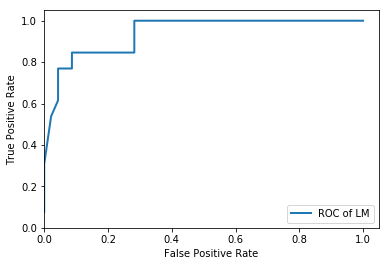

In [5]:
#绘制ROC曲线
from sklearn.metrics import roc_curve
predict_result = net.predict(test[:,:3]).reshape(len(test))
fpr,tpr,thresholds = roc_curve(test[:,3],predict_result,pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='ROC of LM')
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate')
plt.xlim(0,1.05) #边界范围
plt.ylim(0,1.05)
plt.legend(loc=4) #图例
plt.show()

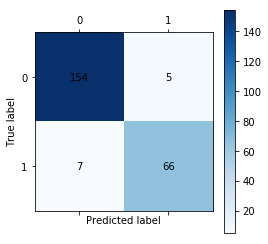

In [6]:
#CART决策树模型
import pandas as pd
from random import shuffle
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix,roc_curve

datafile = r'D:\Books\Python\Python数据分析与挖掘实战\chapter6\chapter6\demo\data\model.xls'
data = pd.read_excel(datafile)
data = data.as_matrix() #将表格数据转换为矩阵
shuffle(data) #随机打乱数据
p = 0.8
train = data[:int(len(data)*p),:] #前80%为训练集
test = data[int(len(data)*p):,:] #后20%为测试集

tree = DTC()
tree.fit(train[:,:3],train[:,3]) #训练模型

#混淆矩阵图
cm = confusion_matrix(train[:,3],tree.predict(train[:,:3])) #混淆矩阵
plt.matshow(cm,cmap=plt.cm.Blues)
plt.colorbar()
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.annotate(cm[i,j],xy=(i,j),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
#CART决策数模型准确率
accuracyrate = str((154+66)/(154+66+5+7))
print('准确率：'+accuracyrate)

准确率：0.9482758620689655


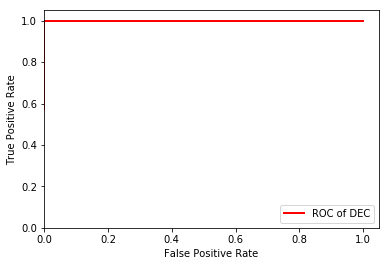

In [8]:
#绘制决策树模型ROC曲线
fpr,tpr,thresholds = roc_curve(test[:,3],tree.predict_proba(test[:,:3])[:,1],pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='ROC of DEC',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.legend(loc=4)
plt.show()

#### 效果对比
>通过对比ROC曲线，CART决策树的ROC曲线更靠近单位正方形的左上角，曲线下的面积更大，说明在当前数据的前提下，CART决策树模型在窃电用户的识别上效果更佳。

>说明：`神经网络模型在这里受限于计算机状态，训练模型时只循环了100次。`